In [1]:
# Projede kullanılan Python kütüphaneleri:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# CSV formatındaki veri setini Pandas ile okuma:

In [4]:
dt = pd.read_csv("hava_durumu_tahmini (5).csv")

In [5]:
# dt’nın ilk 5 verisini getirme:

In [6]:
dt.head()

,id,Şehir,Tarih,Durum,Sıcaklık (°C)
0,0,Istanbul,2024-11-15,Orta kuvvetli yağmurlu,13.0
1,1,Istanbul,2024-11-16,Bölgesel düzensiz yağmur yağışlı,11.1
2,2,Istanbul,2024-11-17,Parçalı Bulutlu,12.0
3,3,Istanbul,2024-11-18,Çok bulutlu,12.0
4,4,Istanbul,2024-11-19,Güneşli,11.9


In [7]:
# Kolon isimlerini ingilizce yapıyorum

In [8]:
dt.columns = ["ID", "City", "Date", "Status", "Temperature (°C)"]

In [9]:
dt.head()

,ID,City,Date,Status,Temperature (°C)
0,0,Istanbul,2024-11-15,Orta kuvvetli yağmurlu,13.0
1,1,Istanbul,2024-11-16,Bölgesel düzensiz yağmur yağışlı,11.1
2,2,Istanbul,2024-11-17,Parçalı Bulutlu,12.0
3,3,Istanbul,2024-11-18,Çok bulutlu,12.0
4,4,Istanbul,2024-11-19,Güneşli,11.9


In [10]:
# Status kolonundaki verileri de ingilizce yapacağım

In [11]:
dt["Status"].unique()

array(['Orta kuvvetli yağmurlu', 'Bölgesel düzensiz yağmur yağışlı',
       'Parçalı Bulutlu', 'Çok bulutlu', 'Güneşli', 'Bulutlu',
       'Şiddetli yağmurlu', 'Orta kuvvetli karlı',
       'Hafif sağnak şeklinde kar', 'Hafif karlı',
       'Hafif dondurucu yağmurlu'], dtype=object)

In [12]:
status_dict = {
    'Orta kuvvetli yağmurlu': 'Moderate rain',
    'Bölgesel düzensiz yağmur yağışlı': 'Scattered rain',
    'Parçalı Bulutlu': 'Partly cloudy',
    'Çok bulutlu': 'Mostly cloudy',
    'Güneşli': 'Sunny',
    'Bulutlu': 'Cloudy',
    'Şiddetli yağmurlu': 'Heavy rain',
    'Orta kuvvetli karlı': 'Moderate snow',
    'Hafif sağnak şeklinde kar': 'Light snow showers',
    'Hafif karlı': 'Light snow',
    'Hafif dondurucu yağmurlu': 'Light freezing rain'
}

dt["Status"] = dt["Status"].map(status_dict)


In [13]:
dt["Status"].unique()

array(['Moderate rain', 'Scattered rain', 'Partly cloudy',
       'Mostly cloudy', 'Sunny', 'Cloudy', 'Heavy rain', 'Moderate snow',
       'Light snow showers', 'Light snow', 'Light freezing rain'],
      dtype=object)

In [15]:
# Status kolonundaki değerleri kategorilere ayıracağım

In [16]:
def weather_category(x):
    x = x.lower()
    if "sunny" in x:
        return "Sunny"
    elif "cloudy" in x:
        return "Cloudy"
    elif "rain" in x:
        return "Rainy"
    elif "snow" in x:
        return "Snowy"
    else:
        return "Other"

dt["Status Category"] = dt["Status"].apply(weather_category)

In [17]:
dt.head()

,ID,City,Date,Status,Temperature (°C),Status Category
0,0,Istanbul,2024-11-15,Moderate rain,13.0,Rainy
1,1,Istanbul,2024-11-16,Scattered rain,11.1,Rainy
2,2,Istanbul,2024-11-17,Partly cloudy,12.0,Cloudy
3,3,Istanbul,2024-11-18,Mostly cloudy,12.0,Cloudy
4,4,Istanbul,2024-11-19,Sunny,11.9,Sunny


In [18]:
dt.isnull().sum() # boş verilerin sayısına bakalım

ID                  0
City                0
Date                0
Status              0
Temperature (°C)    0
Status Category     0
dtype: int64

In [19]:
dt = dt.drop_duplicates(subset=["City", "Date"], keep="first") # Tekrar edenleri silmek için

In [20]:
print("Şehir sayısı:", dt["City"].nunique())
print("Tarih sayısı:", dt["Date"].nunique()) # Her tarihte tüm şehirler var mı diye kontrol edelim

Şehir sayısı: 68
Tarih sayısı: 15


In [21]:
check = dt.groupby("Date")["City"].nunique()
print(check) 

Date
2024-11-15    67
2024-11-16    68
2024-11-17    68
2024-11-18    68
2024-11-19    68
2024-11-20    68
2024-11-21    68
2024-11-22    68
2024-11-23    68
2024-11-24    68
2024-11-25    68
2024-11-26    68
2024-11-27    68
2024-11-28    68
2024-11-29     1
Name: City, dtype: int64


In [22]:
# 2024-11-15 tarihinde 1 tane eksik tarih çıktı 2024-11-29 fazladan 1 veri var 
# 2024-11-29' daki verimizi tamamen kaldıralım verimiz 2024-11-15 ile 2024-11-28 kapsayacak. 
# 2024-11-15 tarihindeki eksik veri üzerine çalışalım.

In [23]:
dt = dt[dt["Date"] != "2024-11-29"] # 2024-11-29 kaldıralım 

In [24]:
check = dt.groupby("Date")["City"].nunique()
print(check) 

Date
2024-11-15    67
2024-11-16    68
2024-11-17    68
2024-11-18    68
2024-11-19    68
2024-11-20    68
2024-11-21    68
2024-11-22    68
2024-11-23    68
2024-11-24    68
2024-11-25    68
2024-11-26    68
2024-11-27    68
2024-11-28    68
Name: City, dtype: int64


In [25]:
# Eksik şehri bulmak için 
all_cities = set(dt["City"].unique())
cities_15 = set(dt[dt["Date"] == "2024-11-15"]["City"].unique())
missing_city = list(all_cities - cities_15)
print("Eksik şehir:", missing_city)
if missing_city:
    missing_row = dt[(dt["City"] == missing_city[0])].iloc[0].copy()  # diğer günden örnek alıyoruz
    missing_row["Date"] = "2024-11-15"  # tarihi 2024-11-15 yap
    dt = pd.concat([dt, pd.DataFrame([missing_row])], ignore_index=True)

Eksik şehir: ['Mus']


In [26]:
check = dt.groupby("Date")["City"].nunique()
print(check) 

Date
2024-11-15    68
2024-11-16    68
2024-11-17    68
2024-11-18    68
2024-11-19    68
2024-11-20    68
2024-11-21    68
2024-11-22    68
2024-11-23    68
2024-11-24    68
2024-11-25    68
2024-11-26    68
2024-11-27    68
2024-11-28    68
Name: City, dtype: int64


In [27]:
dt.info()  # kolonların type bakıyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   City              952 non-null    object 
 2   Date              952 non-null    object 
 3   Status            952 non-null    object 
 4   Temperature (°C)  952 non-null    float64
 5   Status Category   952 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 44.8+ KB


In [29]:
# Date kolonunun veri tipi şu anda object, ama ben gün, ay ve yıl olarak yeni kolonlar oluşturmak istediğim için 
# öncelikle Date kolonunu datetime formatına çevireceğim

In [30]:
dt["Date"] = pd.to_datetime(dt["Date"], errors = "coerce")

In [31]:
dt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                952 non-null    int64         
 1   City              952 non-null    object        
 2   Date              952 non-null    datetime64[ns]
 3   Status            952 non-null    object        
 4   Temperature (°C)  952 non-null    float64       
 5   Status Category   952 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 44.8+ KB


In [32]:
# Gün, ay ve yıl olarak yeni kolonlar oluşturacağım

In [33]:
dt["Day"] = dt["Date"].dt.day
dt["Month"] = dt["Date"].dt.month
dt["Year"] = dt["Date"].dt.year

In [34]:
dt.head()

,ID,City,Date,Status,Temperature (°C),Status Category,Day,Month,Year
0,0,Istanbul,2024-11-15,Moderate rain,13.0,Rainy,15,11,2024
1,1,Istanbul,2024-11-16,Scattered rain,11.1,Rainy,16,11,2024
2,2,Istanbul,2024-11-17,Partly cloudy,12.0,Cloudy,17,11,2024
3,3,Istanbul,2024-11-18,Mostly cloudy,12.0,Cloudy,18,11,2024
4,4,Istanbul,2024-11-19,Sunny,11.9,Sunny,19,11,2024


In [35]:
# 15-28 Kasım 2024 Tarihleri Arasında Türkiye’de Şehirlerin Ortalama Sıcaklık Dağılımı

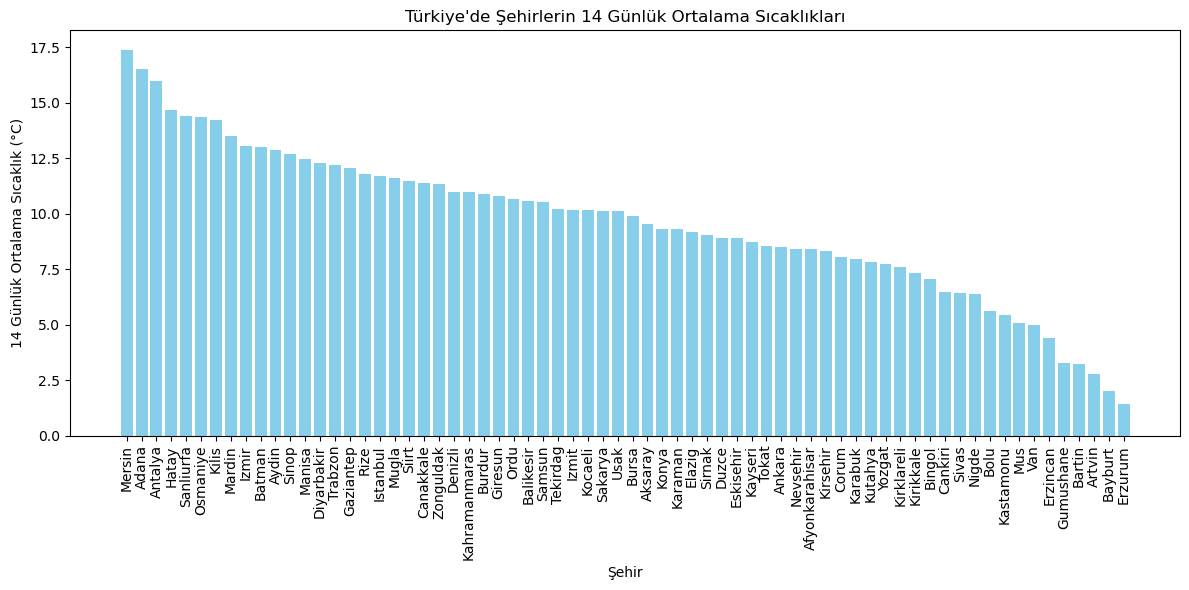

In [36]:
city_avg_temp = dt.groupby("City")["Temperature (°C)"].mean().reset_index()
city_avg_temp = city_avg_temp.sort_values(by="Temperature (°C)", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(city_avg_temp["City"], city_avg_temp["Temperature (°C)"], color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Şehir")
plt.ylabel("14 Günlük Ortalama Sıcaklık (°C)")
plt.title("Türkiye'de Şehirlerin 14 Günlük Ortalama Sıcaklıkları")
plt.tight_layout()
plt.show()

In [37]:
# 15 Kasım- 28 Kasım 2024 Arası Ortalama En Soğuk 5 Şehir ile Ortalama En Sıcak 5 Şehir

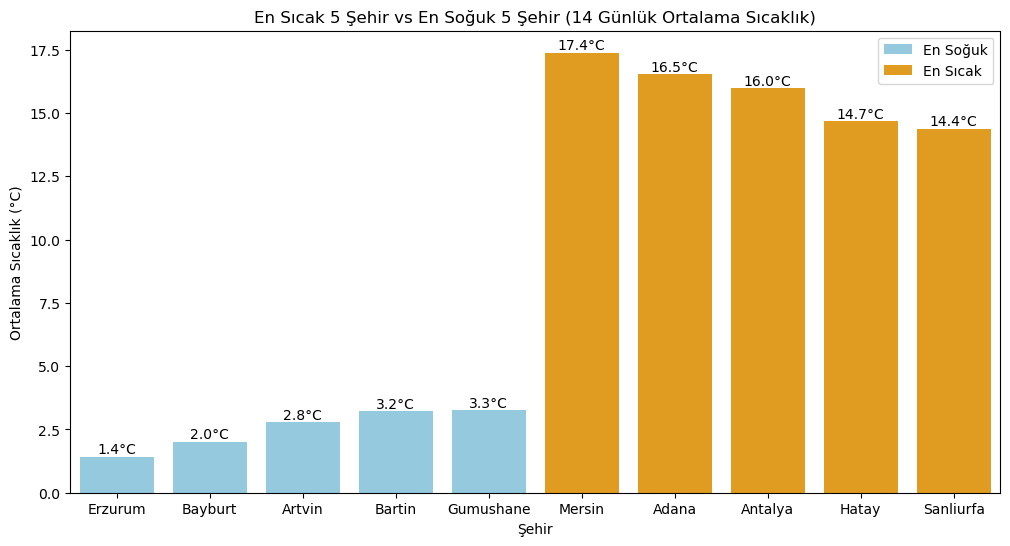

In [38]:
city_avg = dt.groupby("City")["Temperature (°C)"].mean().reset_index()
hottest_5 = city_avg.sort_values(by="Temperature (°C)", ascending=False).head(5)
coldest_5 = city_avg.sort_values(by="Temperature (°C)", ascending=True).head(5)

plt.figure(figsize=(12,6))
sns.barplot(x="City", y="Temperature (°C)", data=coldest_5, color="skyblue", label="En Soğuk")
sns.barplot(x="City", y="Temperature (°C)", data=hottest_5, color="orange", label="En Sıcak")

plt.title("En Sıcak 5 Şehir vs En Soğuk 5 Şehir (14 Günlük Ortalama Sıcaklık)")
plt.xlabel("Şehir")
plt.ylabel("Ortalama Sıcaklık (°C)")
plt.legend()

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}°C', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom')

plt.show()

In [39]:
# 15-28 Kasım 2024: Türkiye Genelinde Günlük Ortalama Sıcaklık

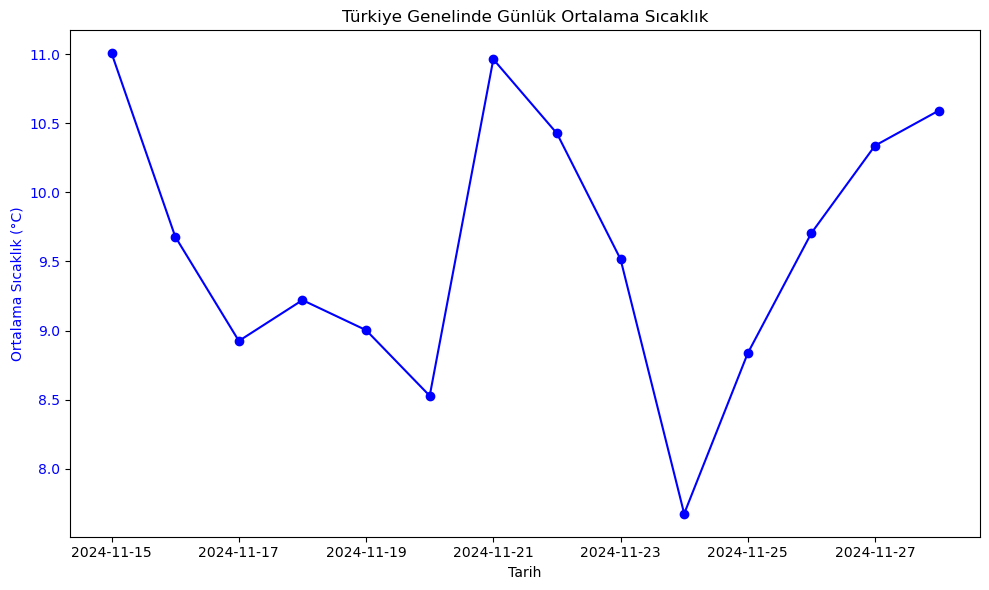

In [48]:
daily_stats = dt.groupby("Date")["Temperature (°C)"].agg(["mean"]).reset_index()

fig, ax1 =plt.subplots(figsize=(10,6))
ax1.plot(daily_stats["Date"], daily_stats["mean"], marker="o", color="blue", label="Ortalama Sıcaklık")
ax1.set_xlabel("Tarih")
ax1.set_ylabel("Ortalama Sıcaklık (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

plt.title("Türkiye Genelinde Günlük Ortalama Sıcaklık")
fig.tight_layout()
plt.show()

In [41]:
# 15-28 Kasım 2024: Türkiye’de Günlük Hava Durumu Dağılımı

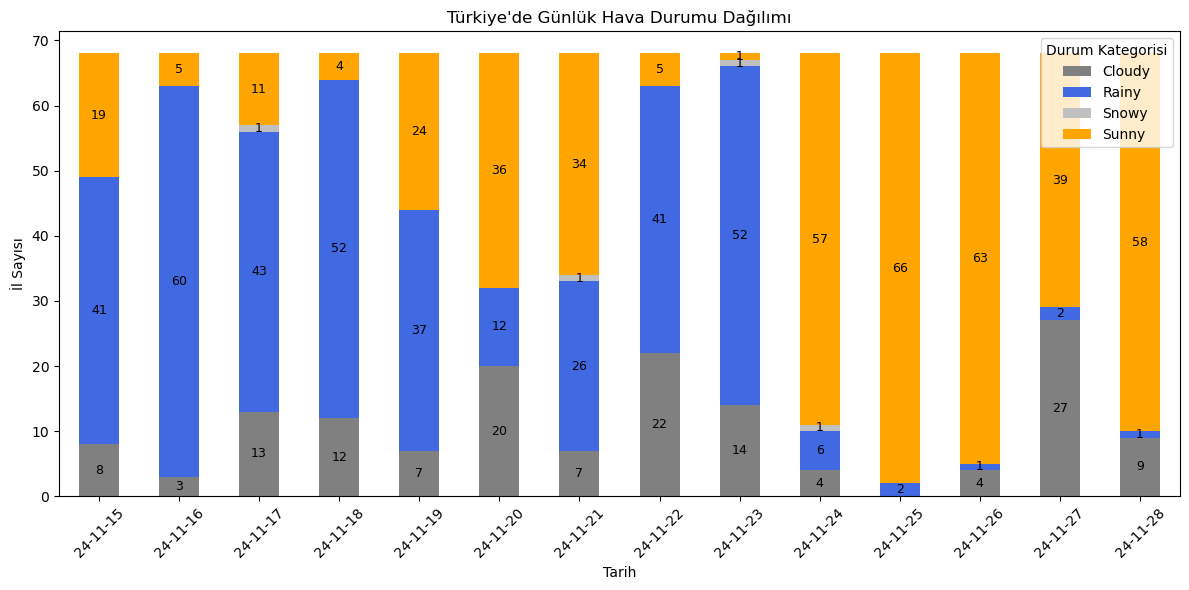

In [42]:
daily_category = dt.groupby(["Date", "Status Category"])["City"].nunique().reset_index()
daily_pivot = daily_category.pivot(index="Date", columns="Status Category", values="City").fillna(0)

colors = {
    "Cloudy": "gray",
    "Rainy": "royalblue",
    "Snowy": "silver",
    "Sunny": "orange"
}
ax = daily_pivot.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12,6), 
    color=[colors[cat] for cat in daily_pivot.columns]
)
ax.set_xticks(range(len(daily_pivot)))  
ax.set_xticklabels(daily_pivot.index.strftime("%y-%m-%d"), rotation=45)


for i in range(len(daily_pivot)):
    y_offset = 0
    for category in daily_pivot.columns:
        value = daily_pivot.iloc[i][category]
        if value > 0:
            ax.text(
                i, 
                y_offset + value/2, 
                int(value), 
                ha='center', 
                va='center', 
                fontsize=9, 
                color='black'
            )
            y_offset += value

plt.xlabel("Tarih")
plt.ylabel("İl Sayısı")
plt.title("Türkiye'de Günlük Hava Durumu Dağılımı")
plt.xticks(rotation=45)
plt.legend(title="Durum Kategorisi")
plt.tight_layout()
plt.show()


In [43]:
# 15-28 Kasım 2024 Hava Durumu Kategorilerine Göre Sıcaklık Dağılımı 

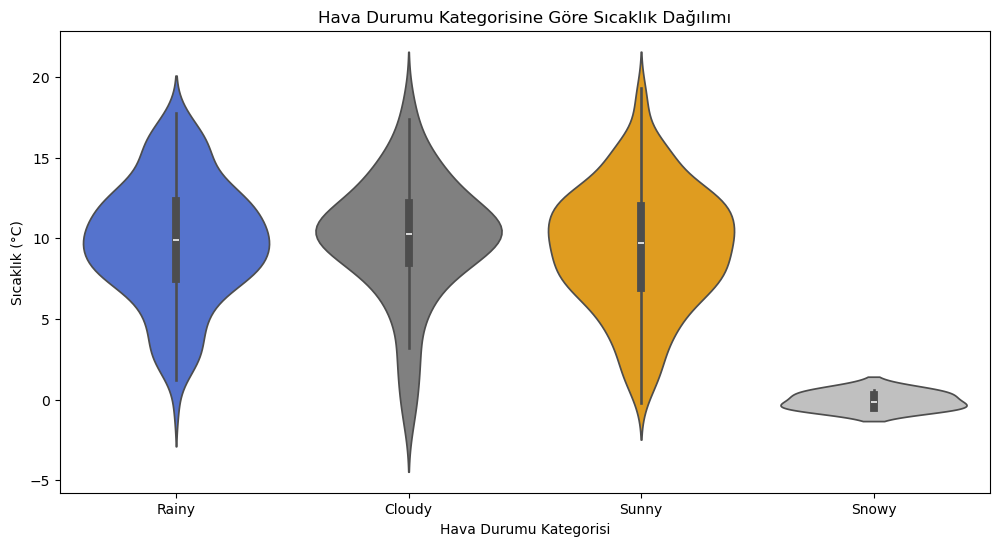

In [44]:
plt.figure(figsize=(12,6))
colors = {
    "Cloudy": "gray",
    "Rainy": "royalblue",
    "Snowy": "silver",
    "Sunny": "orange"
}
sns.violinplot(
    x="Status Category",
    y="Temperature (°C)",
    hue="Status Category",
    data=dt,
    palette=colors,
    legend=False
)
plt.title("Hava Durumu Kategorisine Göre Sıcaklık Dağılımı")
plt.xlabel("Hava Durumu Kategorisi")
plt.ylabel("Sıcaklık (°C)")
plt.show()

In [45]:
# Hava durumunun alt kırılımlarının dağılımı 

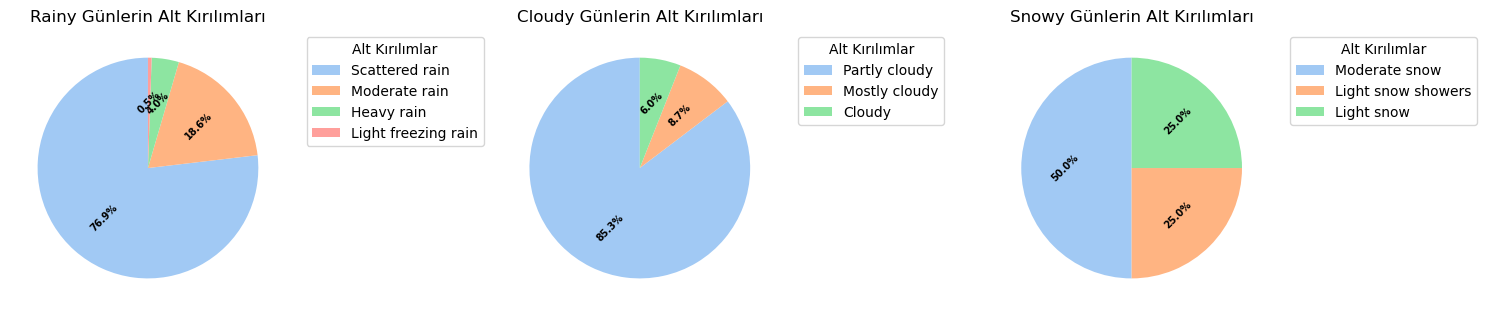

In [46]:
colors = sns.color_palette("pastel")
categories = ["Rainy", "Cloudy", "Snowy"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, cat in enumerate(categories):
    subset = dt[dt["Status Category"] == cat]
    counts = subset["Status"].value_counts()

    wedges, texts, autotexts = axes[i].pie(
        counts,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )
    axes[i].legend(counts.index, title="Alt Kırılımlar", bbox_to_anchor=(1.05, 1))
    axes[i].set_title(f"{cat} Günlerin Alt Kırılımları")
    plt.setp(autotexts, size=7, weight="bold",  color="black" , rotation = 45)

plt.tight_layout()
plt.show()